# ML Lab 10 ANN - Python with Keras


In this example we will work with a dataset about students.

Most of the columns are self explanatory, its simple student data across three schools in Delhi : Kendriya Vidyalaya, Govt Primary School and Navodaya Vidyalaya

PS: Vidyalaya means School in Hindi and its imaginary data for reference only

## Problem Statement

Based on the previous records, create a Deep Learning based predictor who will help us to identify if the student is potentially going to fail this year, so the teacher can put more focus on that group of students.

Let's start. You will need Keras and Tensorflow

# # 10.1 Data preparation

In [ ]:
import pandas as pd
import os

In [ ]:
df_all_student = pd.read_csv("Student.csv",encoding ='utf-8')

In [ ]:
df_all_student.shape

In [ ]:
df_all_student.sample(5)

In [ ]:
X=df_all_student.iloc[:, 2:12]

In [ ]:
y=df_all_student.iloc[:, 12]

We all know that that all the Machine Learning/Deep Learning (ML/DL) works on numeric data but ‘School’ and ‘Gender’ are text data, so we need to encode the text data to numeric and we know that sklearn will do this work for us

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
labelencoder_X_School = LabelEncoder()
X.iloc[:,1]= labelencoder_X_School.fit_transform(X.iloc[:, 1])

In [ ]:
labelencoder_X_Gender = LabelEncoder()
X.iloc[:,2]= labelencoder_X_Gender.fit_transform(X.iloc[:, 2])

In [ ]:
X.head(3)

You can see both ‘School’ and ‘Gender’ are now numeric but we are trapped in new problem. Based on numeric value, this can easily confuse our model if we have some order or hierarchy which is not true. So here ‘OneHotEncoder’ will help us which splits the column into multiple columns. The numbers are replaced by 1s and 0s, depending on which column has what value.

As you can see in the constructor, we specify which column has to be one hot encoded, in this case.

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

In [ ]:
ct = ColumnTransformer([('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X), dtype=float)

In [ ]:
pd.DataFrame(X,index=X[:,0]).head(2)

Now we can fall into ‘dummy variable trap’ i.e. the independent variables are multi-collinear — two or more variables are highly correlated. Solution : just drop one variable like

In [ ]:
X = X[:, 1:]
pd.DataFrame(X,index=X[:,0]).head()

Now, all set with data so we can split training and testing data set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

80% training, 20 % test and mentioning random_state means training and test data will be same every time, if not mention random_state then it will not be deterministic or different next run.
In normal ML life cycle, we standardize or normalize the data so most of them will be in same range

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 10.2 ANN in action

This is an artistic thing where you need to create first ANN schema/graph and then hyper-tuning. there is no formula and most of things is hit and trial. We only have few recommendations and rest everything is artistic here.
Initialize basic Keras Sequential model (output of each layer is input to the next layer of our implementation)

### Adding first input layer and first hidden layer

#### Dense: 
fully connected layer in a sequential mode, implementation of the equation output = activation(dot(input, kernel) + bias)

This means that we are taking the dot product between our input tensor and whatever the weight kernel matrix is featured in our dense layer.

#### Parameters:
Units: it denotes the output size of the layer, normally average of no of node in input layer (no of independent variable) which is 11 and no of node in output layer which is 1, we took 6 as average.

#### Kernel_initializer : 
The initializer parameters tell Keras how to initialize the values of our layer, weight matrix and our bias vector

#### Activation: 
Element-wise activation function to be used in the dense layer. read more about Rectified Linear Unit (ReLU)

#### Input_dim: 
for first layer only, number of input independent variable. only for first hidden layer

#### Bias: 
if we are going with advance implementation

#### Dropout
to avoid over-fitting, dropout is a technique where randomly selected neurons are ignored during training

#### Middle Layer and final one
last layer activation function is different than previous one. Here normally use ‘sigmoid’ for boolean and ‘softmax’ for multi class.

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
cf = Sequential()

In [ ]:
cf.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
cf.add(Dropout(rate = 0.1))

In [ ]:
cf.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
cf.add(Dropout(rate = 0.1))
cf.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [ ]:
# Uncomment if you would like to visualize
# from ann_visualizer.visualize import ann_viz;
# ann_viz(cf, title=" Simple ");

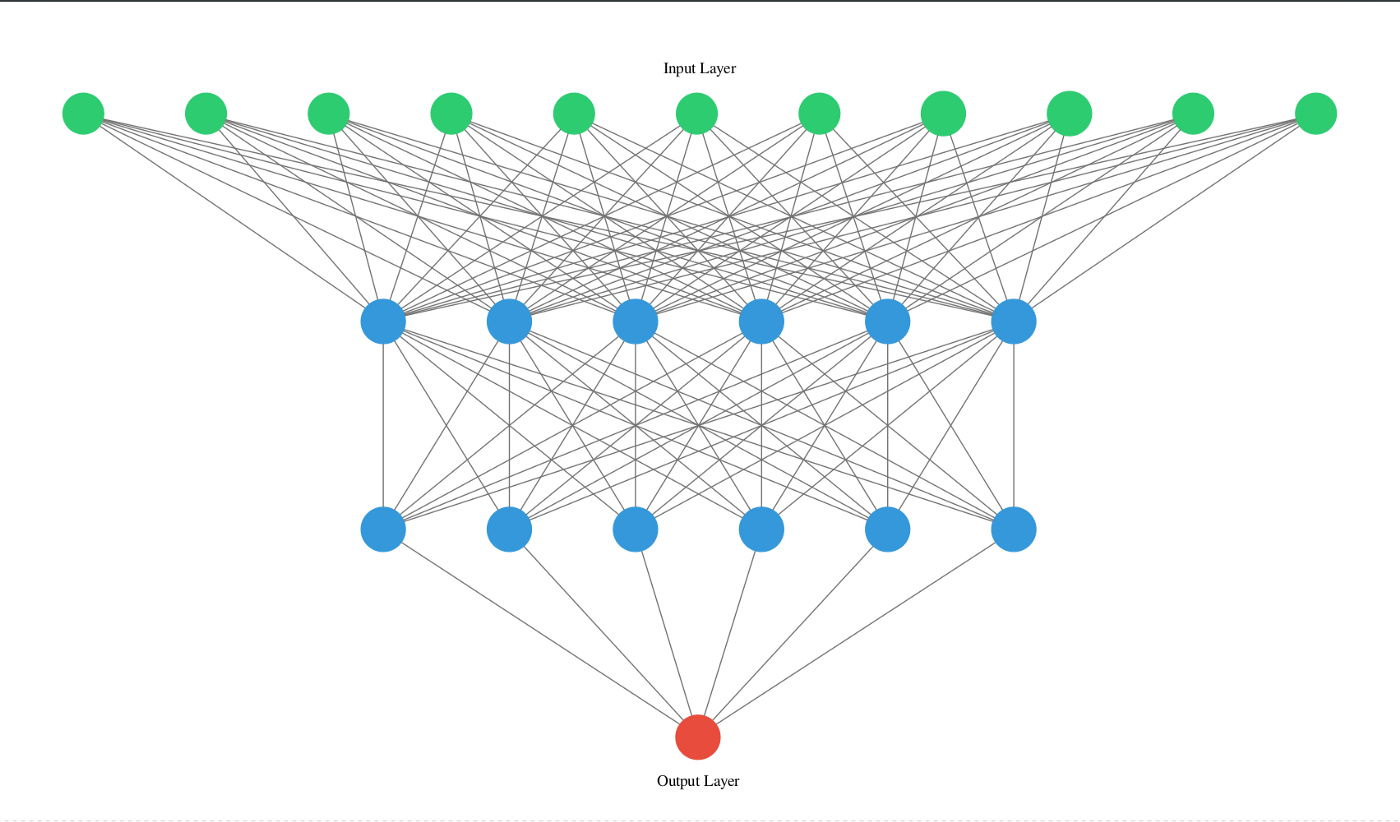

### Compile

you need to configure the learning process.

- Optimizer : update the weight parameters to minimize the loss function.
- Loss function : acts as guides to the terrain telling optimizer if it is moving in the right direction to reach the bottom of the valley, the global minimum.
- Metrics: A metric function is similar to a loss except that the results from evaluating a metric are not used when training the model.

Keras has provided multiple existing option for each parameter and someone can override it too

In [ ]:
cf.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
X_train.shape

### Fit

Actual training based on the classifier
- The batch size: hyper-parameter related to sample
- epochs: hyper-parameter related to iteration

NB have a look at the accuracy...

In [ ]:
cf.fit(X_train, y_train, batch_size = 10, epochs = 100)

### Prediction of test results

you can get any specific student prediction like this cf.predict(X_test[0:1,:]) or pass the same shape and normalized array to get new student prediction.


In [ ]:
y_prediction =cf.predict(X_test)

In [ ]:
X_test

In [ ]:
X_test[0:2,:]

In [ ]:
cf.predict(X_test[0:1,:])

In [ ]:
# pd.DataFrame(y_prediction,index=y_prediction[:,0]).head()

## 10.2 Cross validation

### k-Fold Cross-Validation
Our model test and training data may be biased, so cross validation techniques used for better model performance measurement . In K-fold, is when the dataset is randomly split up into ‘k’ groups. One of the groups is used as the test set and the rest are used as the training set.

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
#from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
def kera_classifier():
    cf = Sequential()
    cf.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    cf.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    cf.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    cf.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return cf
cf = KerasClassifier(build_fn = kera_classifier, batch_size = 10, epochs = 100)
accuracies = cross_val_score(estimator = cf, X = X_train, y = y_train, cv = 10, n_jobs = -1)
mean = accuracies.mean()
variance = accuracies.std()

### Grid Search Cross Validation
Using this, you can automatically do hyper tuning, like you will provide multiple optimizer, epochs, batch size combination and it will automatically create all permutation from them run each of them and finally show you the final best parameters and you can use it for your final production project. It will reduce a lot of time manual, and kind of automation within machine learning

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
#from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
def kera_classifier(optimizer):
    cf = Sequential()
    cf.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    cf.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    cf.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    cf.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return cf
cf = KerasClassifier(build_fn = kera_classifier)
parameters = {'batch_size': [10, 15],
              'epochs': [10, 50],
              'optimizer': ['adam', 'rmsprop']}
gv_search = GridSearchCV(estimator = cf,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
gv_search = gv_search.fit(X_train, y_train)
best_param = gv_search.best_params_
best_acc = gv_search.best_score_

*This notebook contains an excerpt from the [Artificial Neural Network(ANN) with Keras simplified, Use Case ](https://medium.com/analytics-vidhya/artificial-neural-network-ann-with-keras-simplified-use-case-if-student-pass-the-exam-code-949ddb2a9c91).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT).*